# Analyzing the Data in Ford's GoBike Program

## Investigation Overview

In this investigation, we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Ford themselves. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it and have some fun along the way.

## Dataset Overview

The dataset(s) provided to us by Lyft contain the following fields:

```
 - Trip Duration (seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
```

In [1]:
#Importing all the things we'll be using to create our visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Importing the datasets and dataframes we'll be using along the way
df_lyft = pd.read_csv('lyft-data/lyft-master.csv')

df_lyft_membersonly = df_lyft_membersonly = df_lyft.dropna()

top_starts = df_lyft['start_station_name'].value_counts().index[:5]
df_lyft_stations = df_lyft.loc[df_lyft['start_station_name'].isin(top_starts)]

df_lyft_mo_samp = df_lyft_membersonly.sample(250000)

## Duration of Bike Rides in General

To begin with, I was just curious to see how many rides were taken in general. We see by the visualization below that the average ride is about 4.5 minutes.

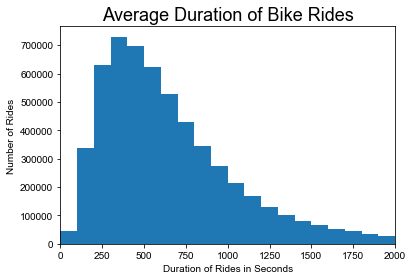

In [3]:
#Visualizing the data in a histogram
duration_bins = np.arange(0, df_lyft['duration_sec'].max() + 100, 100)
plt.hist(data = df_lyft, x = 'duration_sec', bins = duration_bins);

plt.xlim(0, 2000);
plt.style.use('seaborn')
plt.title('Average Duration of Bike Rides', fontsize = 18);
plt.xlabel('Duration of Rides in Seconds');
plt.ylabel('Number of Rides');
plt.style.use('seaborn');

## Members vs. Non-Member Counts

Because this dataset contains fields for both members of the Ford GoBike program as well as the non-members, I thought it would be interesting to see what the difference was like there. I've contained two visualizations below to support this. One is a strict comparison of numbers, and the other is a relative frequency distribution. What I find here is that the number of members greatly outnumbers the non-members, which leads me to believe that a) there are benefits to being a member that aren't directly stated in the dataset, or similarly b) it's simply cheaper to have a membership. The dataset doesn't share whether or not we have repeat customers, and many of this rides may represent that.

In [4]:
#Determining number of members and non-members
n_members = df_lyft_membersonly.shape[0]
n_nonmembers = df_lyft.shape[0] - n_members

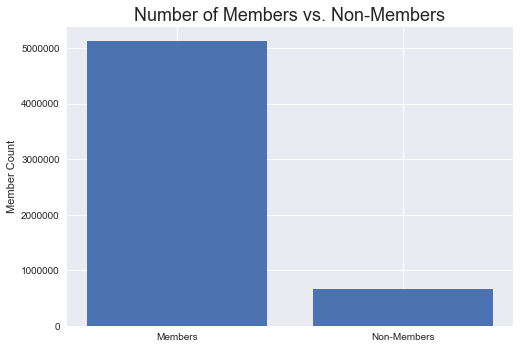

In [5]:
#Visualizing number of members vs. non-members in a pure count form
plt.bar(x = ['Members', 'Non-Members'], height = [n_members, n_nonmembers]);
plt.title('Number of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Member Count');
plt.style.use('seaborn')

In [6]:
#Determining ratios of members vs. non-members
member_percentage = n_members / df_lyft.shape[0]
nonmember_percentage = n_nonmembers / df_lyft.shape[0]

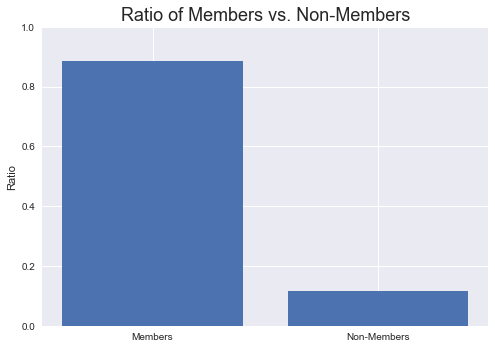

In [7]:
#Visualizing ratios of members vs. non-members
plt.bar(x = ['Members', 'Non-Members'], height = [member_percentage, nonmember_percentage]);
plt.title('Ratio of Members vs. Non-Members', fontsize = 18);
plt.ylabel('Ratio');
plt.ylim(0,1);
plt.style.use('seaborn')

## Number of Rides in a Given Month Over Time

In this next visualization, let's take a look at how many rides people took each month over time. While we see a general trend in growth, we see an interesting dip around November and December of 2018, similarly in the end of the 2019. My anticipation is that these are likely colder months were people are less inclined to be taking bike rides! Whereas we can see the biggest peaks around January and Feburary 2020. Over all we cas see the rides are increasing monthly from the start. Adding in additional data about weather would help to validate this. Of course, there may be other reasons that the data is representative like this, but due to the limited nature of the dataset, we cannot infer much more.

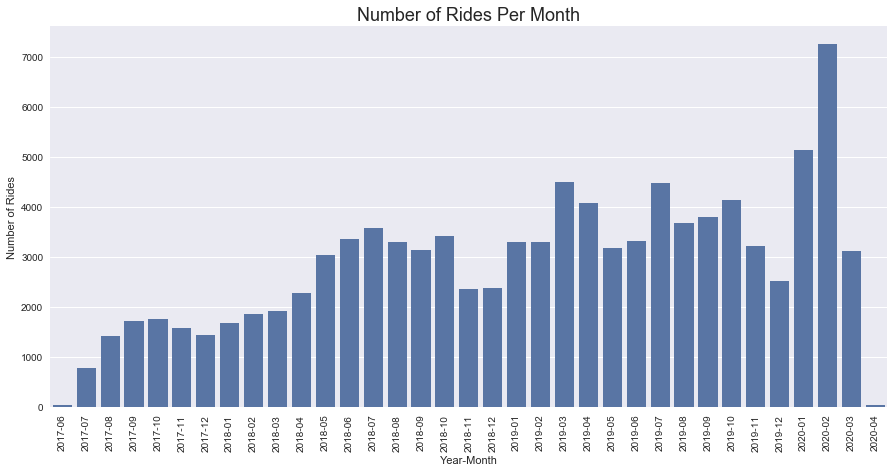

In [8]:
#Visualizing the data with a sample of 100000 records
plt.figure(figsize = (15, 7))
base_color = sb.color_palette()[0]
df_lyft_samp = df_lyft.sample(100000)
sb.countplot(data = df_lyft_samp.sort_values(by='year-month'), x = 'year-month', color = base_color);
plt.title('Number of Rides Per Month', fontsize = 18);
plt.xlabel('Year-Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90);
plt.style.use('seaborn')

## Average Ride Time Per Month

Where we did a general look at how many rides were taken each month in an earlier visual, this pointplot visual here shows the average durations of those rides per month. Not surprisingly, the longer rides seem to take place in the summer months whereas rides were shorter in those more wintry months.

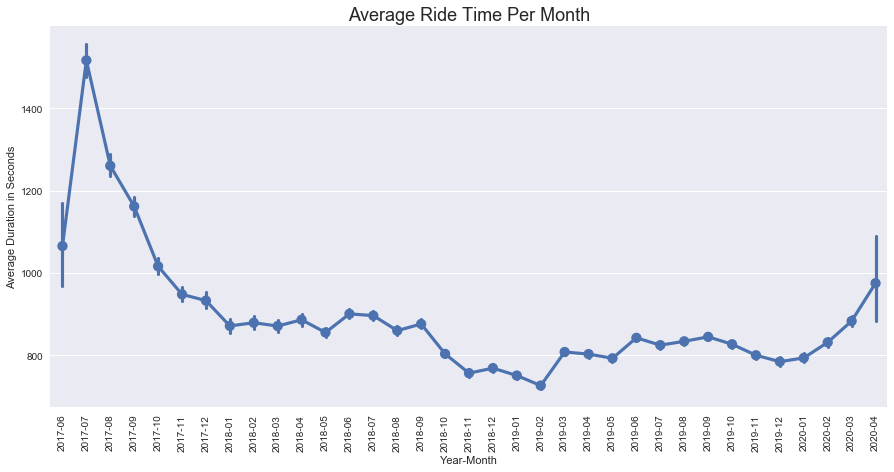

In [9]:
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))
sb.pointplot(data = df_lyft_membersonly.sort_values(by='year-month'), x = 'year-month', y = 'duration_sec');
plt.xticks(rotation = 90);
plt.title('Average Ride Time Per Month', fontsize = 18);
plt.ylabel('Average Duration in Seconds');
plt.xlabel('Year-Month');
plt.style.use('seaborn')

## Duration of Bike Rides from Top 5 Visited Stations

Now, let's look to see how long of bike rides were taken on average from the top 5 most visited stations. For the most part, they align pretty tightly together; however, the last station listed (San Franscisco Ferry Building) had a wider distribution of ride durations. 

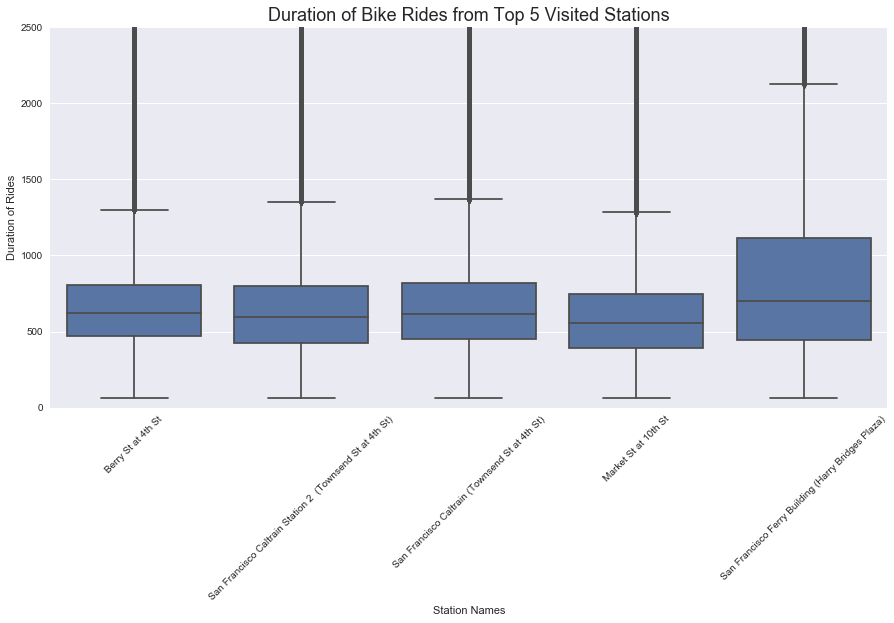

In [10]:
#Visualizing the data in a boxplot
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = df_lyft_stations, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

##  Which type of user tends to take  longer rides in a specific month.

In this next visualization, we'll use some user type distinctive markers to determine how long rides tend to be across the user type. Not surprisingly, the durations for the subscriber shows that they are tend to take longer rides.

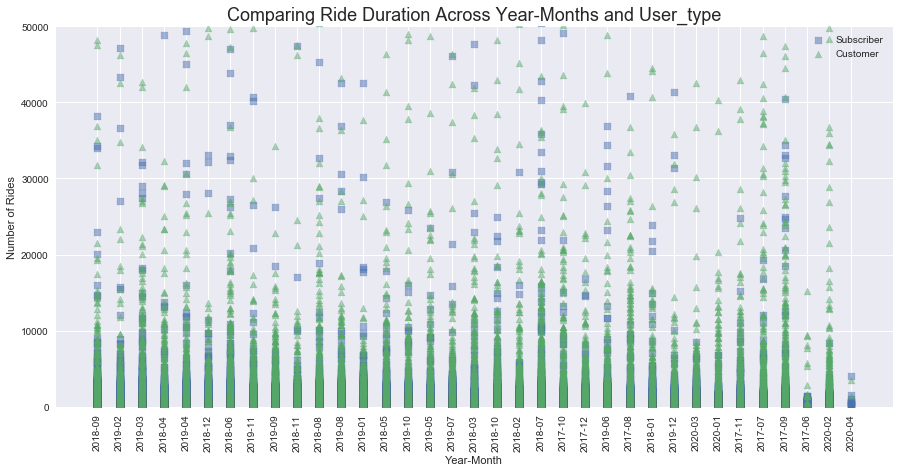

In [11]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
df_lyft_mo_samp = df_lyft_membersonly.sample(250000)

plt.figure(figsize = (15,7))

cat_markers = [['Subscriber', 's'],
               ['Customer', '^']]

for cat, marker in cat_markers:
    df_user_type = df_lyft_mo_samp[df_lyft_mo_samp['user_type'] == cat]
    plt.scatter(data = df_user_type, x = 'year-month', y = 'duration_sec', marker = marker, alpha = .5);
plt.legend(['Subscriber', 'Customer']);
plt.xticks(rotation = 90);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Year-Months and User_type', fontsize = 18);
plt.xlabel('Year-Month');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')